<a href="https://colab.research.google.com/github/rayanecardozo/machine-learning-studies/blob/main/02_Classificacao_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados Sobre a Doença de Alzheimer (dados sintéticos)

### 1 - Qual a tarefa de predição?
Classificação do diagnóstico de Alzheimer com base em características médicas e comportamentais dos pacientes.

###2 - Qual o tamanho do conjunto e dados?
2.149 observações (pacientes)

###3 -  Quantos objetos?
1 - 'DoctorInCharge'

### 4 - Quantas caracteristicas?
33 características (variáveis)


###5 - Quais são as características do conjunto de dados?
Fatores demográficos: (idade, gênero, etnia, nível educacional), hábitos de vida (fumo, álcool, atividade física, dieta, sono), histórico médico (doenças cardiovasculares, diabetes, hipertensão, colesterol), avaliações cognitivas: (MMSE, avaliação funcional) e sintomas comportamentais: (confusão, desorientação, mudanças de personalidade, esquecimentos).


###6 - Quais características são categóricas?
Gênero, etnia, histórico familiar de Alzheimer, doenças preexistentes (cardiovasculares, diabetes, hipertensão), tabagismo, problemas comportamentais (confusão, desorientação, mudanças de personalidade, dificuldades em tarefas).

###7 - Quais são numéricas?
Idade, nível educacional, IMC, consumo de álcool, atividade física, qualidade da dieta e do sono, pressão arterial sistólica e diastólica, colesterol total/LDL/HDL/triglicerídeos, avaliação funcional, MMSE, memória, dificuldades em atividades diárias.

###8 - Qual a proporção de cada classe?
%    Rótulo

65% - 1

35% - 0


In [ ]:
# Importanto os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
# Fazendo a leitura dos Dados
df = pd.read_csv("data_alzheimer.csv")
pd.set_option('display.max_columns', None)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


Variáveis numéricas:
BMI
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
MMSE
FunctionalAssessment
ADL

Variáveis categóricas:
EducationLevel
Gender
Ethnicity
Smoking
FamilyHistoryAlzheimers
CardiovascularDisease
Diabetes
Depression
HeadInjury
Hypertension
MemoryComplaints
BehavioralProblems
Confusion
Disorientation
PersonalityChanges
DifficultyCompletingTasks
Forgetfulness
Diagnosis

In [ ]:
# Removendo colunas desnecessárias
df = df.drop(columns=['DoctorInCharge', 'PatientID'])
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
# Proporção de 'Diagnosis'(proporção das classes)
print(df['Diagnosis'].value_counts(normalize=True) * 100)

Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


65% (0) estão rotulados com não alzheimer e

35% (1) estão diagnosticado com alzheimer.

Isso nos diz que o conjunto de dados esta desbalanceado, sendo a classe 0 com maior percentual de valores em relação a classe 1.

In [ ]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [ ]:
# Estatísticas descritivas das colunas numéricas do dataset
numericas = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
             'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
             'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
             'FunctionalAssessment', 'ADL']
df[numericas].describe()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


### Análise estatística descritiva

BMI: O Índice de Massa Corporal (BMI) apresenta uma média de aproximadamente 27.66, o que indica que boa parte da amostra encontra-se na faixa de sobrepeso. Porém os valores variam consideravelmente, com registros que vão de 15,01 — baixo peso, até quase 40, sugerindo obesidade grau II. Essa amplitude nos mostra a diversidade dos perfis corporais presentes no grupo.

Em relação ao consumo de álcool, a média é de 10 unidades em uma escala que parece variar de 0 a 20. Esse valor pode ser considerado elevado, especialmente quando se observa que há indivíduos com consumo quase nulo, enquanto outros atingem níveis muito altos. O padrão de distribuição dos dados aponta para uma assimetria positiva, o que sugere a presença de um subgrupo com consumo excessivo.

A prática de atividade física, assim como a qualidade da dieta e do sono, também foi avaliada em escalas de 0 a 10. A média para essas três dimensões é em torno de 5, o que mostra um padrão moderado — ou seja, a maioria dos participantes mantém hábitos saudáveis em níveis intermediários. No entanto, os valores mínimos revelam situações de extremo sedentarismo, alimentação inadequada e sono de baixa qualidade, o que pode impactar negativamente a saúde física e mental ao longo do tempo.

Os dados de pressão arterial mostram uma média de 134 mmHg para a pressão sistólica e 90 mmHg para a diastólica, valores que se encontram no limiar da hipertensão. A variação é ampla, com registros de pressão sistólica que vão de 90 até 179 mmHg, o que demonstra a presença tanto de indivíduos com pressão controlada quanto com níveis perigosamente elevados.

O colesterol total médio é de 225 mg/dL, e o LDL, conhecido como "colesterol ruim", está em torno de 124 mg/dL. Ambos os valores se encontram em uma faixa de atenção, com risco cardiovascular aumentado. Em contraste, o HDL ("colesterol bom") tem média de 59 mg/dL, considerado um valor positivo. Contudo, os triglicerídeos aparecem com média de 228 mg/dL, um valor alto que requer alerta para possíveis problemas metabólicos na amostra.

A avaliação cognitiva, representada pelo Mini Exame do Estado Mental (MMSE), indica um comprometimento notável, com uma média de apenas 14,76 pontos — lembrando que o escore máximo da escala é 30. Esse resultado mostra que grande parte dos participantes apresenta algum grau de déficit cognitivo, podendo indicar quadros de demência ou comprometimento neuropsicológico.

Os escores da avaliação funcional e do desempenho em atividades da vida diária (ADL) têm médias em torno de 5 em uma escala de 0 a 10. Essa pontuação intermediária mostra que metade da amostra ainda mantém certo grau de autonomia, enquanto a outra metade já enfrenta limitações funcionais mais significativas. A grande variação nesses escores indica que o grupo é heterogêneo quanto à capacidade de realizar atividades básicas do cotidiano.

In [ ]:
# Definindo X (features) e y (target)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

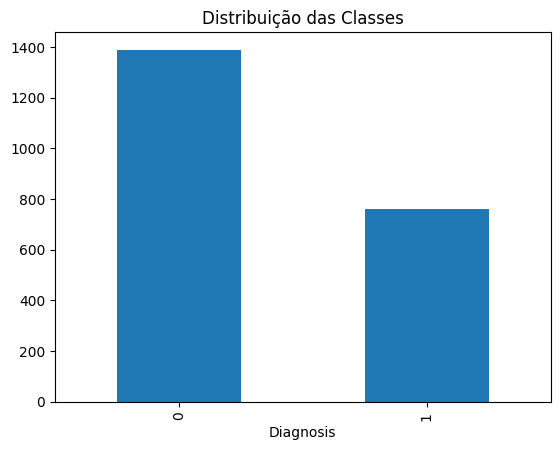

In [ ]:
# Distribuição das classes
y.value_counts().plot(kind='bar', title='Distribuição das Classes')
plt.show()

Classe 0 representa quase o dobro de valores da classe 1, uma claro desbalanceio no dataset.

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
# Aplica o scaler e cria um novo DataFrame com os dados normalizados
df_normalizado = df.copy()
df_normalizado[numericas] = scaler.fit_transform(df[numericas])

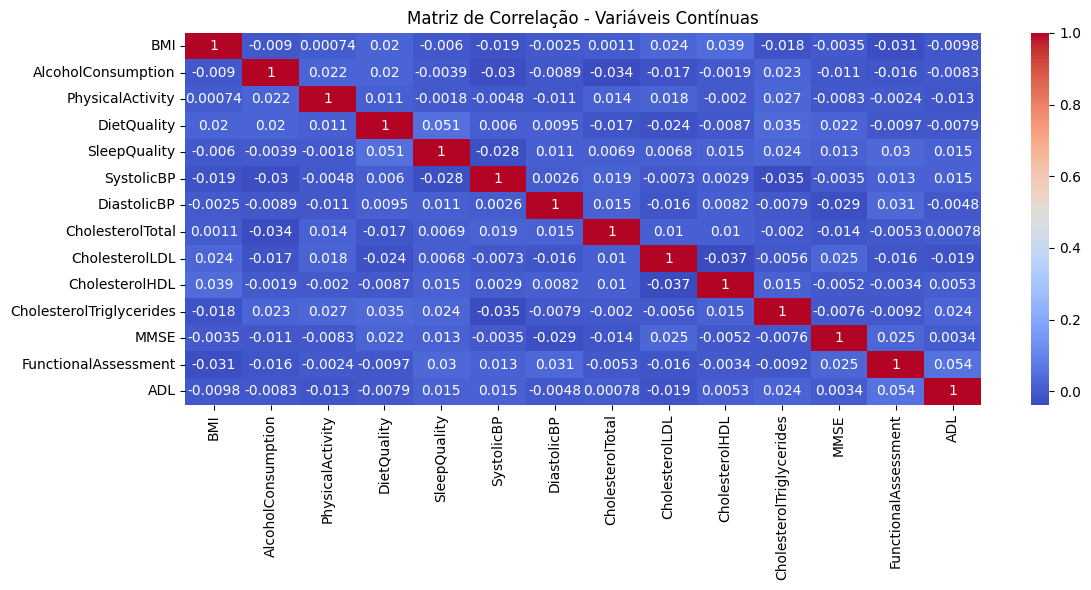

In [ ]:
# Matriz de correlação das variáveis contínuas
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalizado[numericas].corr(), cmap='coolwarm', annot=True)
plt.title("Matriz de Correlação - Variáveis Contínuas")
plt.tight_layout()
plt.show()

Como poucas variáveis têm correlação elevada entre si, não há forte multicolinearidade.

In [ ]:
# Definindo X (features) e y (target)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [ ]:
# Divisão do Conjunto de Teste
# 25% do conjunto de dados serão retidos para testes
from sklearn.model_selection import train_test_split

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Classificadores
# Treinando os 2 classificadores em X_train e y_train
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

In [ ]:
# treinando os dados
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Previsões
y_pred_knn = knn.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# Avaliação dos Modelos - acurácia
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia do KNN: {accuracy_knn:.4f}")
print(f"Acurácia da Árvore de Decisão: {accuracy_dt:.4f}")

Acurácia do KNN: 0.5446
Acurácia da Árvore de Decisão: 1.0000


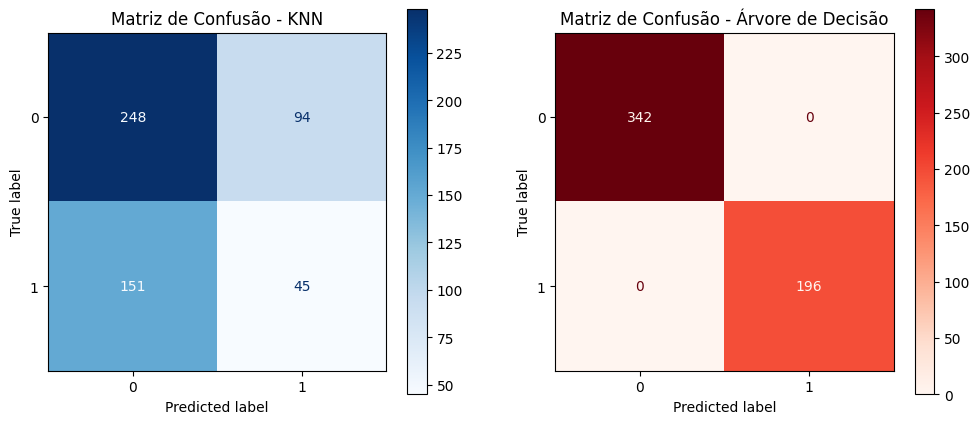

In [ ]:
# Matrizes de Confusão
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_knn).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusão - KNN")
ConfusionMatrixDisplay(cm_dt).plot(ax=axes[1], cmap='Reds')
axes[1].set_title("Matriz de Confusão - Árvore de Decisão")
plt.show()


No KNN, o modelo conseguiu classificar corretamente 248 exemplos da classe 0, mas apresentou 94 falsos positivos e 151 falsos negativos. Isso significa que muitas pessoas que deveriam ter sido classificadas como portadoras de Alzheimer (classe 1) foram erroneamente classificadas como não portadoras (classe 0), o que é extremamente crítico em contextos clínicos, já que um falso negativo pode impedir que uma pessoa receba o acompanhamento necessário.

Em contrapartida, o modelo de Árvore de Decisão acertou todos os exemplos, com 342 classificações corretas para a classe 0 e 196 para a classe 1, sem apresentar nenhum erro. Embora esse desempenho pareça excelente à primeira vista, ele aponta overfitting. Quando um modelo acerta absolutamente tudo em um conjunto de dados, existe a possibilidade de que ele tenha decorado os exemplos, em vez de aprender padrões generalizáveis.

In [ ]:
# Validação Cruzada
cv_knn = cross_val_score(knn, X, y, cv=5)
cv_dt = cross_val_score(decision_tree, X, y, cv=5)

In [ ]:
print(f"\nValidação Cruzada - KNN (Média): {cv_knn.mean():.4f}")
print(f"Validação Cruzada - Árvore de Decisão (Média): {cv_dt.mean():.4f}")


Validação Cruzada - KNN (Média): 0.5970
Validação Cruzada - Árvore de Decisão (Média): 1.0000


##Conclusão:
Sobre a validação cruzada  KNN obteve uma média de 0.5970 na validação cruzada, indicando um desempenho modesto e relativamente instável. Isso sugere que o modelo não consegue capturar com precisão os padrões dos dados, provavelmente devido à complexidade da distribuição das classes ou à sensibilidade do algoritmo à escolha de vizinhos próximos e à escala dos dados, mesmo após a normalização. Já o resultado da Árvore de Decisão, com uma média de 1.0000 na validação cruzada, chama atenção por sua perfeição aparente. Essa pontuação perfeita indica que o modelo classificou corretamente todos os exemplos em todas as dobras da validação cruzada, o que é altamente incomum em dados do mundo real.

Ambos os modelos apresentaram acurácia acima de 50%, indicando um desempenho não muito bom para o KNN e um alto desempenho para Árfore de decisão. No entanto, como o dataset está desbalanceado, a acurácia sozinha pode não ser suficiente para avaliar o desempenho real. Outras métricas como precisão, recall e F1-score poderiam oferecer uma visão mais detalhada. A escolha de hiperparâmetros adequados pode melhorar os resultados, já que os modelos foram testados inicialmente com os valores padrão da biblioteca Scikit-learn.




###Sugestão e continuação para uma melhor análise:
Aplicar técnicas de balanceamento de classes, como oversampling da classe minoritária ou ajuste de pesos no modelo. Testar outros algoritmos.